# IMPORTING PACKAGES

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Reading the Data from CSV file

In [2]:
bike = pd.read_csv("X:\IIIT\BikeAssign\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#  Understanding the data

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

INSIGHTS: - Dataset has 730 rows and 16 columns. - Except one column, all other are either float or integer type. One column is date type. - Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. - We will have to analyse and decide whether to convert them to categorical or treat as integer

# Checking for Null/Missing/Duplicate values

In [7]:
#checking null values in the coloumns
round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

INSIGHTS: - There are NO MISSING/NULL values

In [8]:
# Creating a dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

INSIGHTS: - The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were NO DUPLICATE values in the dataset

In [9]:
def meta(x):
    Nulls = x.isnull().sum()
    Null_Percent = (x.isnull().sum()/len(x))*100
    Unique = x.nunique()
    Datatypes = x.dtypes
    return pd.concat([Datatypes, Unique,Nulls, Null_Percent], axis=1, keys=['Data_Type', 'Unique','Nulls', 'Null_Percent' ])

bike_info=meta(bike)
bike_info.reset_index(drop=False)

,index,Data_Type,Unique,Nulls,Null_Percent
0,instant,int64,730,0,0.0
1,dteday,object,730,0,0.0
2,season,int64,4,0,0.0
3,yr,int64,2,0,0.0
4,mnth,int64,12,0,0.0
5,holiday,int64,2,0,0.0
6,weekday,int64,7,0,0.0
7,workingday,int64,2,0,0.0
8,weathersit,int64,3,0,0.0
9,temp,float64,498,0,0.0


# Data Organization ( Coversion and manipulation of data )

In [10]:
#Converting the 'dteday' column from Object datatype to DateTime datatype
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
#Creating new columns for year and month extracted from dteday for better representation
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month
#removing the columns as they are now redundant.
bike.drop(['yr','mnth'],axis=1,inplace=True)
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
#Removing redundant columns (reasoning given below)
bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

# # outliers in temp
# bike = bike.drop(index = bike[(bike['temp'] > 15) & (bike['temp'] < 20) & (bike['cnt'] < 100)].index)
# bike = bike.drop(index = bike[(bike['temp'] > 25) & (bike['temp'] < 30) & (bike['cnt'] < 2000)].index)


# # outliers in atemp
# bike = bike.drop(index = bike[(bike['atemp'] > 20) & (bike['atemp'] < 25) & (bike['cnt'] < 100)].index)
# bike = bike.drop(index = bike[(bike['atemp'] > 30) & (bike['atemp'] < 35) & (bike['cnt'] < 2000)].index)


# #outliers in hum
# bike = bike.drop(index = bike[(bike['hum'] < 20)].index)

# #outliers in windspeed
# bike = bike.drop(index = bike[(bike['windspeed'] > 30)].index)

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis: - instant : Its only an index value - dteday : This has the date, Since we already have seperate columns for 'year' & 'month' we could live without this column. - casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns. 

In [12]:
#renaming columns for clear understanding
bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [13]:
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
bike['season'] = bike['season'].replace(season_labels)
bike['month'] = bike['month'].replace(mnth_labels)
bike['weekday'] = bike['weekday'].replace(weekday_labels)
bike['weathersit'] = bike['weathersit'].replace(weathersit_labels)

bike.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,0,Monday,1,cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,january
1,spring,0,Tuesday,1,cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,january
2,spring,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,2018,january
3,spring,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,2018,january
4,spring,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,2018,january


In [14]:
bike['season']=bike['season'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike['month']=bike['month'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
humidity      730 non-null float64
windspeed     730 non-null float64
count         730 non-null int64
year          730 non-null int64
month         730 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


# Visualising the data (Categorical)

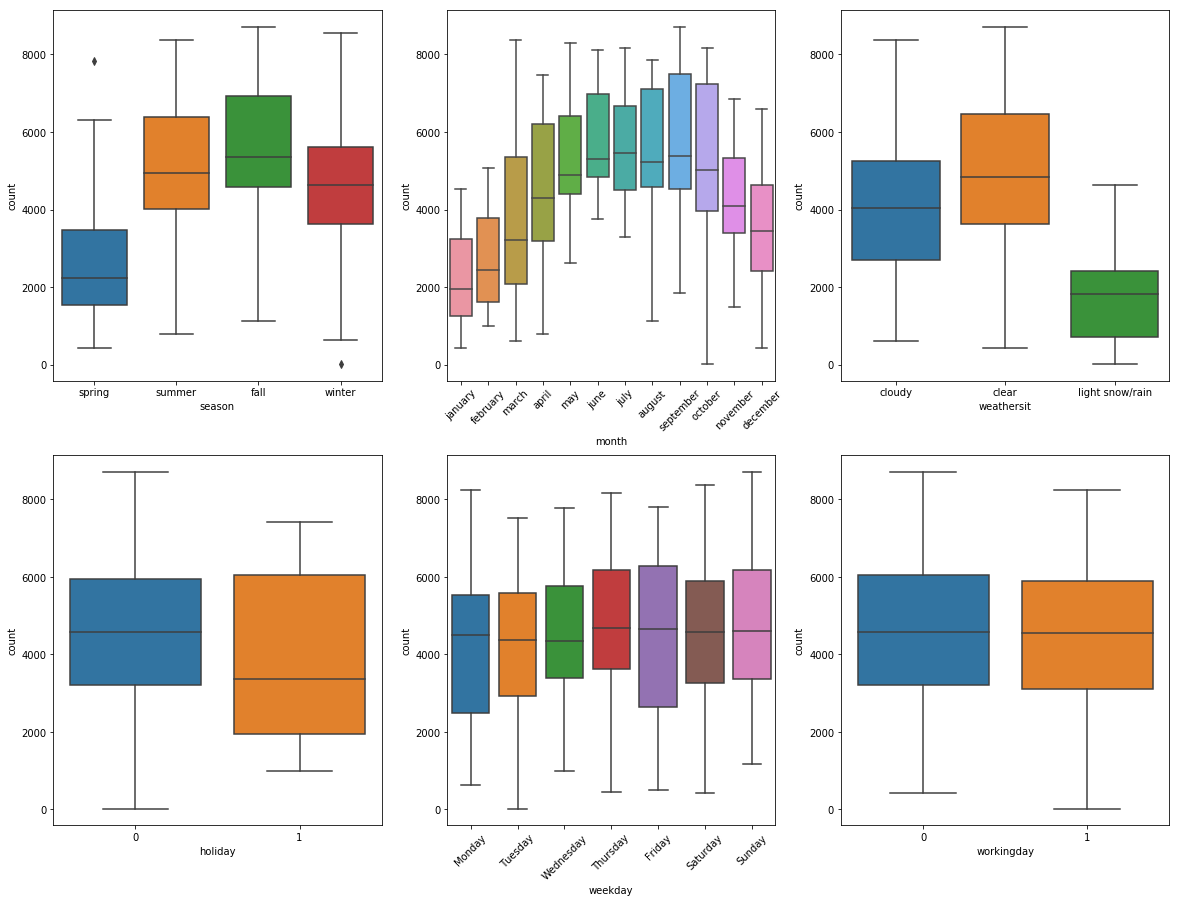

In [15]:
# Building a boxplot of all categorical variables againt the target variable 'count' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.tick_params(axis='x', rotation=45)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.tick_params(axis='x', rotation=45)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.show()

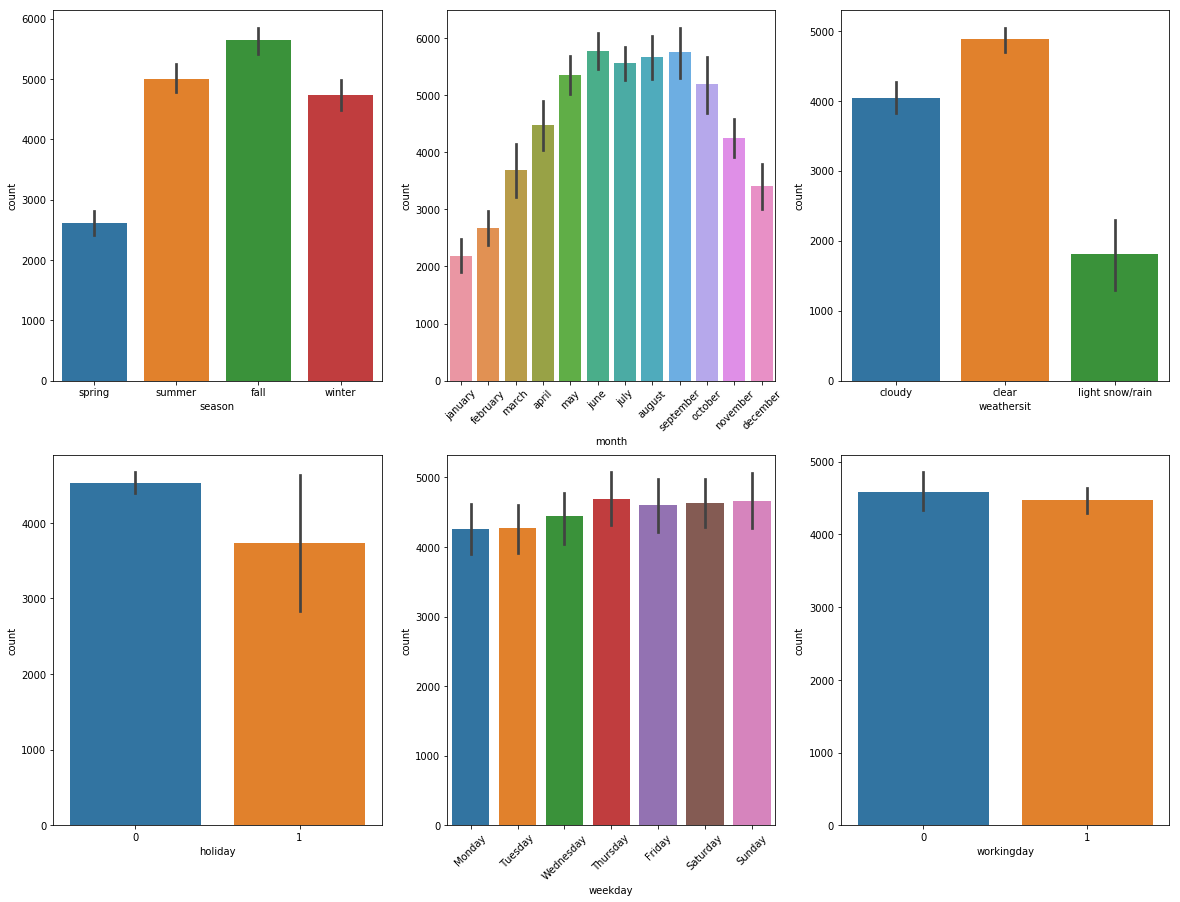

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.barplot(x = 'month', y = 'count', data = bike)
plt.tick_params(axis='x', rotation=45)
plt.subplot(2,3,3)
sns.barplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.barplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.barplot(x = 'weekday', y = 'count', data = bike)
plt.tick_params(axis='x', rotation=45)
plt.subplot(2,3,6)
sns.barplot(x = 'workingday', y = 'count', data = bike)
plt.show()

# Visualising the data (Numerical)

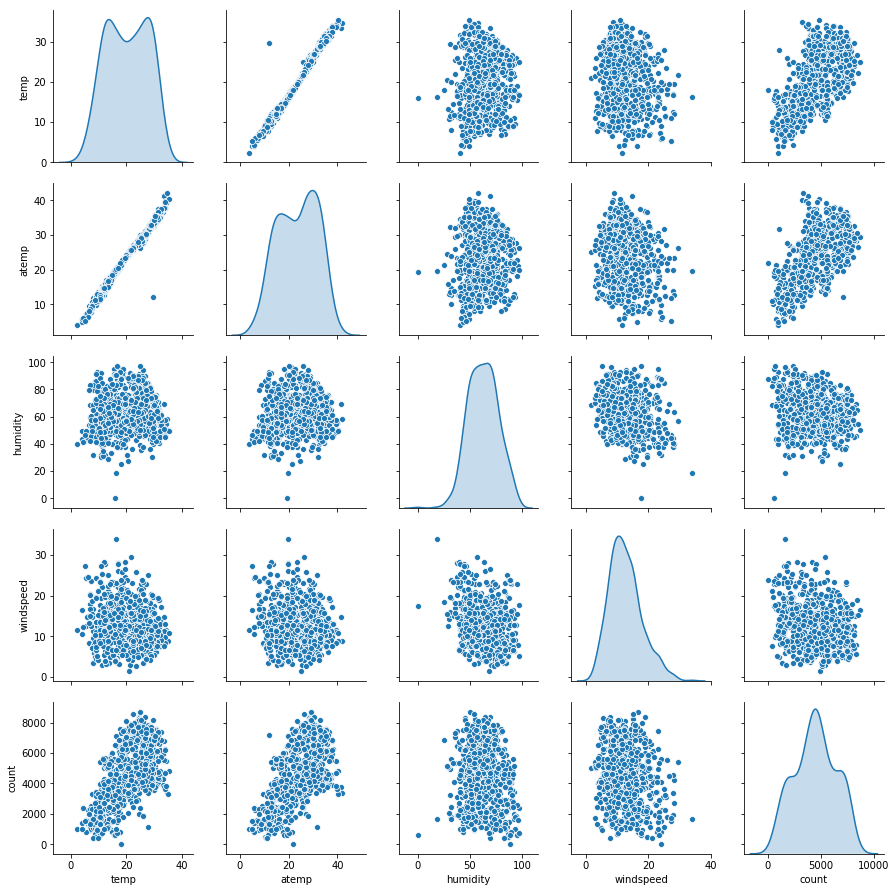

In [17]:
bike_num=bike[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()


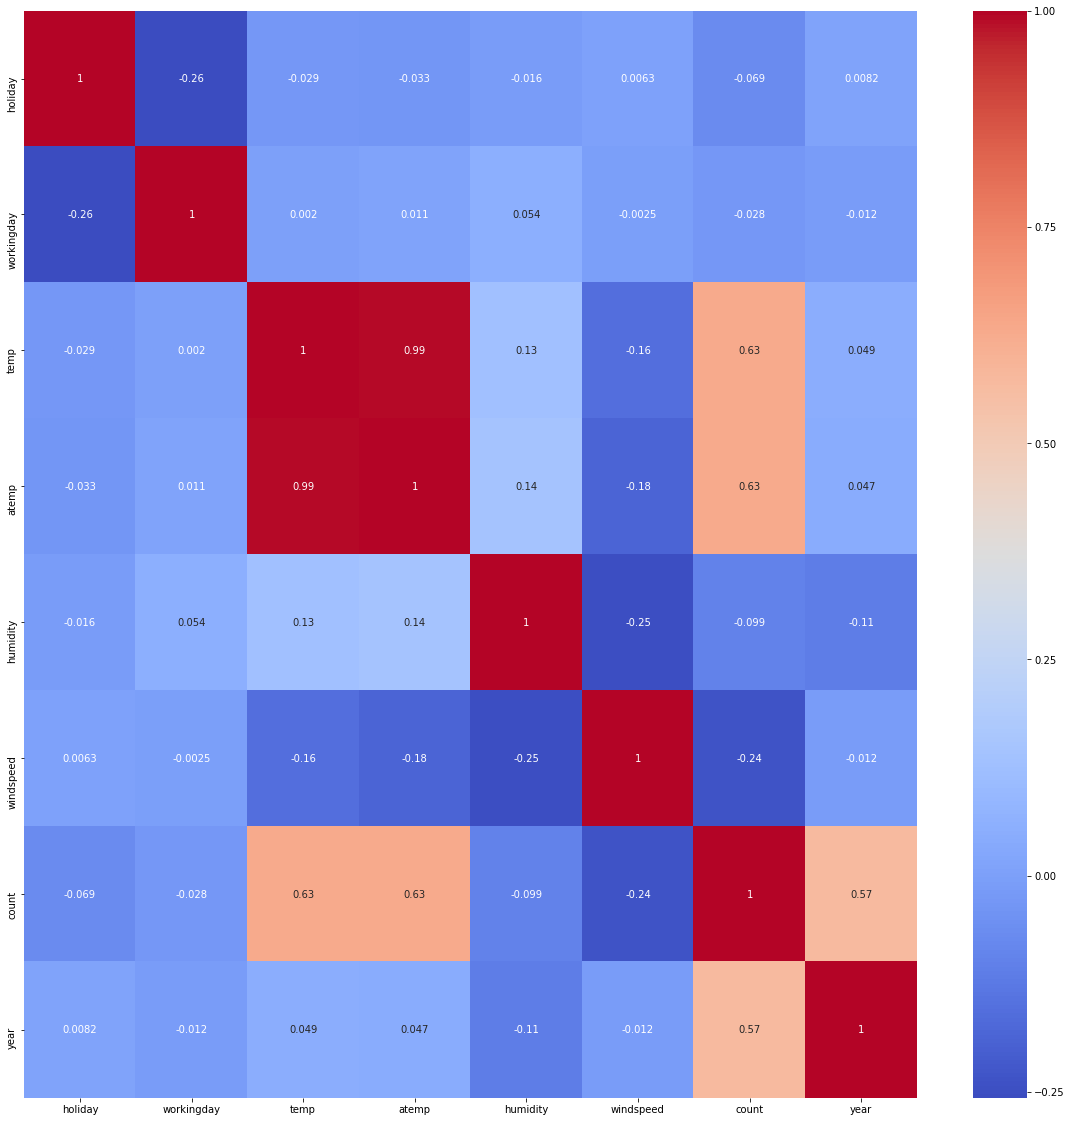

In [18]:

plt.figure(figsize = (20,20))
sns.heatmap(bike.corr(), annot = True, cmap="coolwarm")
plt.show()

# Data Preperation

In [19]:
# creating dummy variable columns
season_indicators = pd.get_dummies(bike['season'],drop_first=True)
month_indicators = pd.get_dummies(bike['month'],drop_first=True)
weekday_indicators = pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(bike['weathersit'],drop_first=True)

# adding indicator variable columns to the dataset . Dropping original columns
bike = pd.concat([bike,season_indicators,month_indicators,weekday_indicators,weathersit_indicators],axis=1)
bike = bike.drop(columns=['season','month','weekday','weathersit'])

bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,spring,summer,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,1,14.110847,18.18125,80.5833,10.749882,985,2018,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,2018,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike.shape

(730, 30)

# Splitting the data

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
holiday            730 non-null int64
workingday         730 non-null int64
temp               730 non-null float64
atemp              730 non-null float64
humidity           730 non-null float64
windspeed          730 non-null float64
count              730 non-null int64
year               730 non-null int64
spring             730 non-null uint8
summer             730 non-null uint8
winter             730 non-null uint8
august             730 non-null uint8
december           730 non-null uint8
february           730 non-null uint8
january            730 non-null uint8
july               730 non-null uint8
june               730 non-null uint8
march              730 non-null uint8
may                730 non-null uint8
november           730 non-null uint8
october            730 non-null uint8
september          730 non-null uint8
Monday             730 non-null uint8
Saturday     

In [22]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [23]:
train_meta = meta(bike_train)
train_meta.reset_index(drop=False)

,index,Data_Type,Unique,Nulls,Null_Percent
0,holiday,int64,2,0,0.0
1,workingday,int64,2,0,0.0
2,temp,float64,387,0,0.0
3,atemp,float64,491,0,0.0
4,humidity,float64,445,0,0.0
5,windspeed,float64,467,0,0.0
6,count,int64,492,0,0.0
7,year,int64,2,0,0.0
8,spring,uint8,2,0,0.0
9,summer,uint8,2,0,0.0


In [24]:
test_meta = meta(bike_test)
test_meta.reset_index(drop=False)

,index,Data_Type,Unique,Nulls,Null_Percent
0,holiday,int64,2,0,0.0
1,workingday,int64,2,0,0.0
2,temp,float64,195,0,0.0
3,atemp,float64,216,0,0.0
4,humidity,float64,204,0,0.0
5,windspeed,float64,214,0,0.0
6,count,int64,212,0,0.0
7,year,int64,2,0,0.0
8,spring,uint8,2,0,0.0
9,summer,uint8,2,0,0.0


In [25]:
bike_train.shape

(510, 30)

In [26]:
bike_test.shape

(219, 30)

In [27]:
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,spring,summer,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
653,0,1,19.201653,23.0423,55.8333,12.208807,7534,2019,0,0,...,1,0,0,0,0,0,0,1,0,0
576,0,1,29.246653,33.1448,70.4167,11.083475,7216,2019,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,16.980847,20.6746,62.1250,10.792293,4066,2019,1,0,...,0,0,0,0,1,0,0,0,1,0
728,0,1,10.489153,11.5850,48.3333,23.500518,1796,2019,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,15.443347,18.8752,48.9583,8.708325,4220,2019,0,1,...,0,0,0,0,1,0,0,0,1,0


In [28]:
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,spring,summer,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
184,1,0,29.793347,33.27085,63.7917,5.459106,6043,2018,0,0,...,0,0,0,0,0,0,0,1,1,0
535,0,1,32.082500,36.04875,59.2083,7.625404,6211,2019,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,19.270000,22.85230,81.2917,13.250121,2659,2018,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,1,31.433347,34.24915,42.4167,13.417286,4780,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,32.19710,30.5000,19.583229,4968,2018,0,1,...,0,0,0,1,0,0,0,0,0,0


# Rescaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,spring,summer,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,2019,0,0,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,2019,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,2019,1,0,...,0,0,0,0,1,0,0,0,1,0
728,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,2019,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,2019,0,1,...,0,0,0,0,1,0,0,0,1,0


In [30]:
bike_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,spring,summer,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,2018.507843,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.500429,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,2018.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,2019.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,2019.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a Linear Model

In [31]:
y_train = bike_train.pop('count')
X_train = bike_train

In [32]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
653,0,1,0.509887,0.501133,0.575354,0.300794,2019,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,2019,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,2019,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,0,1,0.245101,0.200348,0.498067,0.663106,2019,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,2019,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 10),
 ('december', True, 1),
 ('february', False, 2),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 7),
 ('november', True, 1),
 ('october', False, 12),
 ('september', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('cloudy', True, 1),
 ('light snow/rain', True, 1)]

In [36]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'spring', 'summer',
       'winter', 'december', 'january', 'july', 'november', 'september',
       'cloudy', 'light snow/rain'],
      dtype='object')

In [37]:
X_train_rfe = X_train[selected_features]

In [62]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        23:22:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -464.4819     16.306    -28.486      0.000    -496.519    -432.445
holiday            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                0.4800      0.037     12.977      0.000       0.407       0.553
humidity           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
year                0.2303      0.008     28.511      0.000       0.214       0.246
spring             -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer              0.0408      0.015      2.659      0.008       0.011       0.071
winter              0.1034      0.018      5.763      0.000       0.068       0.139
december           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
january            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
july               -0.0555      0.018     -3.046      0.002      -0.091      -0.020
november           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
september           0.0749      0.017      4.438      0.000       0.042       0.108
cloudy             -0.0559      0.010     -5.338      0.000      -0.076      -0.035
light snow/rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                     8.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelling:

Approach

- A mixed approach is followed.
- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    vif_frame['vif'] = round(vif_frame['vif'], 2)
    print(vif_frame.sort_values(by='vif',ascending=False))

### Model 1:

In [40]:
features_1 = selected_features
vif(X_train[selected_features])
ols_fit(y_train,X_train[features_1])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx



              index          vif
0             const  16885621.02
6            spring         5.27
2              temp         4.42
8            winter         3.83
7            summer         2.76
3          humidity         1.93
12         november         1.76
10          january         1.68
14           cloudy         1.57
9          december         1.49
11             july         1.49
13        september         1.34
15  light snow/rain         1.26
4         windspeed         1.21
5              year         1.04
1           holiday         1.03
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        23:22:48   Log-

,Features,VIF
4,year,81.83
2,humidity,39.74
1,temp,28.94
5,spring,6.94
3,windspeed,5.55
7,winter,5.07
6,summer,3.65
13,cloudy,2.38
11,november,1.92
9,january,1.84


##### NOTE: - Removing the variable 'atemp' based on its High p-value & High VIF ---

### Model 2:

In [41]:
del_feature = 'atemp'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        23:22:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -464.4819     16.306    -

,Features,VIF
4,year,81.83
2,humidity,39.74
1,temp,28.94
5,spring,6.94
3,windspeed,5.55
7,winter,5.07
6,summer,3.65
13,cloudy,2.38
11,november,1.92
9,january,1.84


In [42]:
del_feature = 'year'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     51.14
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.04e-86
Time:                        23:22:49   Log-Likelihood:                 266.64
No. Observations:                 510   AIC:                            -503.3
Df Residuals:                     495   BIC:                            -439.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4120      0.058     

,Features,VIF
2,humidity,30.73
1,temp,16.66
3,windspeed,4.72
4,spring,4.28
6,winter,4.00
5,summer,2.78
12,cloudy,2.31
10,november,1.83
8,january,1.74
9,july,1.59


In [43]:
del_feature = 'humidity'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     51.25
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           5.06e-83
Time:                        23:22:49   Log-Likelihood:                 255.65
No. Observations:                 510   AIC:                            -483.3
Df Residuals:                     496   BIC:                            -424.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2822      0.052     

,Features,VIF
2,windspeed,4.66
1,temp,4.57
5,winter,2.91
3,spring,2.85
4,summer,2.22
9,november,1.80
7,january,1.65
8,july,1.59
11,cloudy,1.56
6,december,1.46


In [44]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     55.45
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.06e-83
Time:                        23:22:49   Log-Likelihood:                 255.17
No. Observations:                 510   AIC:                            -484.3
Df Residuals:                     497   BIC:                            -429.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2666      0.050     

,Features,VIF
2,windspeed,4.64
1,temp,4.54
5,winter,2.87
4,summer,2.21
3,spring,2.07
8,november,1.79
7,july,1.58
10,cloudy,1.55
6,december,1.42
9,september,1.35


In [57]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     60.35
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.44e-84
Time:                        23:23:09   Log-Likelihood:                 254.53
No. Observations:                 510   AIC:                            -485.1
Df Residuals:                     498   BIC:                            -434.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2540      0.049     

,Features,VIF
2,windspeed,4.59
1,temp,4.52
4,summer,2.20
3,spring,2.07
5,winter,2.00
7,july,1.58
9,cloudy,1.55
8,september,1.34
6,december,1.26
10,light snow/rain,1.08


In [58]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     66.29
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           4.72e-85
Time:                        23:23:39   Log-Likelihood:                 254.03
No. Observations:                 510   AIC:                            -486.1
Df Residuals:                     499   BIC:                            -439.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.048     

,Features,VIF
2,windspeed,4.59
1,temp,4.51
4,summer,2.20
3,spring,2.02
5,winter,1.75
6,july,1.58
8,cloudy,1.55
7,september,1.34
9,light snow/rain,1.08
0,holiday,1.04


In [59]:
del_feature = 'spring'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

vifx = pd.DataFrame()
X = X_train[selected_features]
vifx['Features'] = X.columns
vifx['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifx['VIF'] = round(vifx['VIF'], 2)
vifx = vifx.sort_values(by = "VIF", ascending = False)
vifx

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     73.52
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.19e-86
Time:                        23:24:01   Log-Likelihood:                 253.47
No. Observations:                 510   AIC:                            -486.9
Df Residuals:                     500   BIC:                            -444.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2035      0.027     

,Features,VIF
1,temp,4.51
2,windspeed,3.00
3,summer,1.75
5,july,1.51
7,cloudy,1.49
4,winter,1.45
6,september,1.29
8,light snow/rain,1.08
0,holiday,1.04


# Final model

In [60]:
final_model = ols_fit(y_train,X_train[selected_features])
final_model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     73.52
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.19e-86
Time:                        23:24:18   Log-Likelihood:                 253.47
No. Observations:                 510   AIC:                            -486.9
Df Residuals:                     500   BIC:                            -444.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2035      0.027     

Text(0.5,0,'Errors')

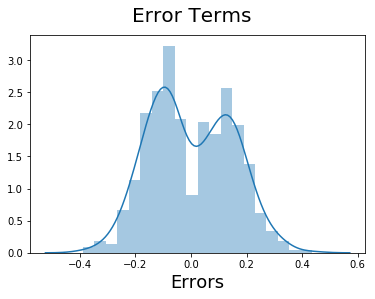

In [61]:
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = final_model.predict(X_train_sm)

res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [50]:
# res = y_train-y_train_pred

# # Plot the histogram of the error terms
# fig = plt.figure()
# sns.distplot((res), bins = 20)
# fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
# plt.xlabel('Errors', fontsize = 18)                         # X-label


In [51]:
# bike_test.columns

In [52]:
# bike_test[num_vars] = scaler.transform(bike_test[num_vars])
# y_test = bike_test.pop('count')
# X_test = bike_test
# X_test = X_test[selected_features]

In [53]:
# X_test = sm.add_constant(X_test)
# y_test_pred = final_model.predict(X_test)

In [54]:
# # Plotting Actual vs Predicted No of rentals 
# fig,ax = plt.subplots()
# fig.set_figheight(8)
# fig.set_figwidth(20)
# l1,=ax.plot(range(len(y_test)),y_test)
# l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
# plt.legend([l1,l2],['Actual','Predicted'])
# plt.title('Predicted vs Actual No of Rentals')
# plt.ylabel('No of Bike Rentals')
# plt.xticks([])
# plt.show()

# plt.figure(figsize=[8,8])
# plt.scatter(y_test,y_test_pred);
# plt.title('Predicted vs Actual No of Rentals')

In [55]:
# from sklearn.metrics import mean_squared_error,r2_score
# mse = mean_squared_error(y_test, y_test_pred)
# rsquared_test = r2_score(y_test, y_test_pred)
# rsquared_train = r2_score(y_train, y_train_pred)
# print('R-squared for train data:',round(rsquared_train,2))
# print('R-squared for test data:',round(rsquared_test,2))
# print('Mean Squared Error',round(mse,3))

In [56]:
# X_train_sm = sm.add_constant(X_train[selected_features])

# y_train_pred = final_model.predict(X_train_sm)
# fig,ax = plt.subplots(1,2)
# fig.set_figheight(8)
# fig.set_figwidth(16)

# ax[0].set(title='Frequency Distribution of Residuals')
# sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

# ax[1].set(title='Predicted Values vs Residuals')
# \
# sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
# plt.show()